# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [288]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [290]:
import pandas as pd
df = pd.read_csv('/content/Traffic Data.csv',parse_dates=['date_time'], index_col=['date_time'])
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [292]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


## Handling  missing values

In [293]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [300]:
df['traffic_volume'].fillna(df['traffic_volume'].mean(), inplace=True)

## Plot the time series data

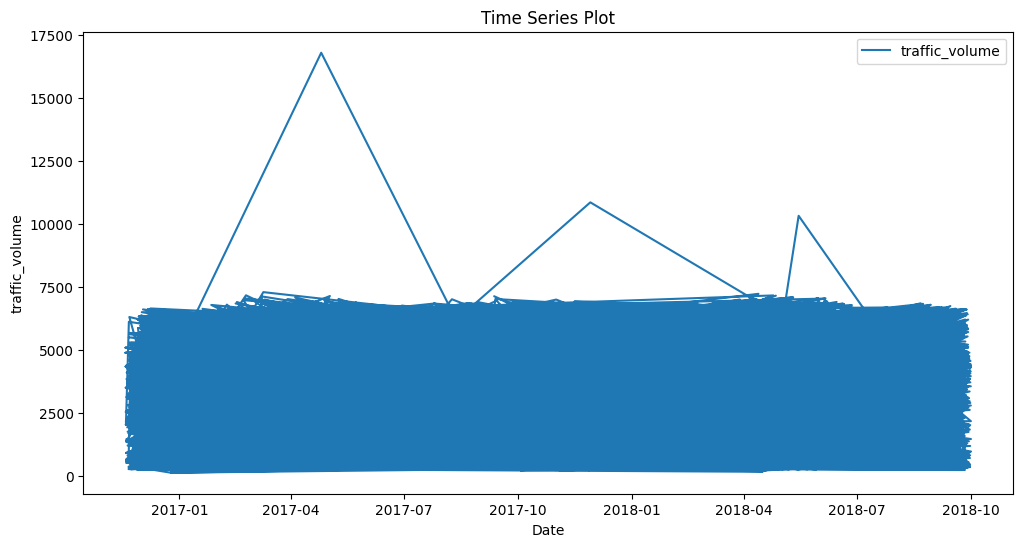

In [295]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['traffic_volume'], label='traffic_volume')
plt.xlabel('Date')
plt.ylabel('traffic_volume')
plt.title('Time Series Plot')
plt.legend()
plt.show()


In [296]:
df = df.reset_index()

## identify any outliers

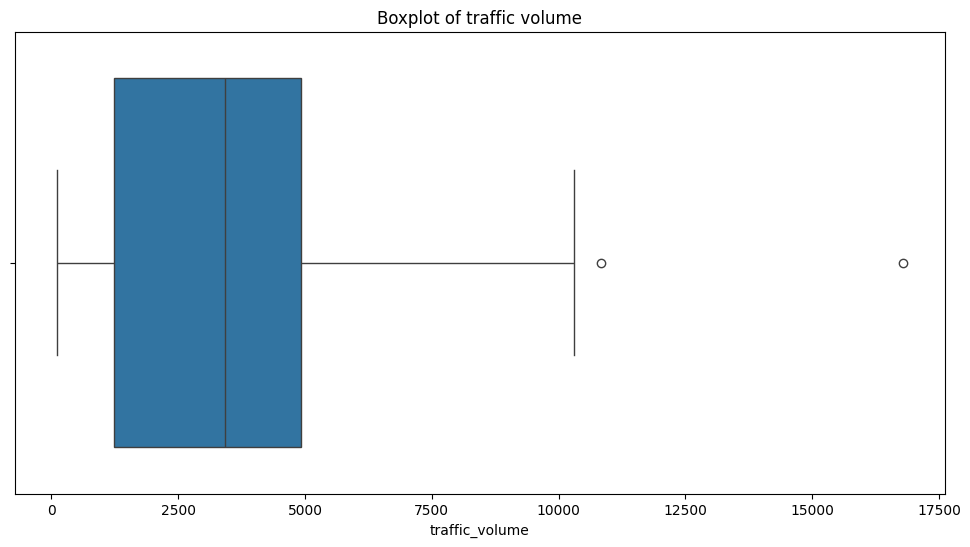

In [297]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['traffic_volume'])
plt.title('Boxplot of traffic volume')
plt.show()

In [298]:
df.set_index('date_time', inplace=True)

## Seasonal Decomposition

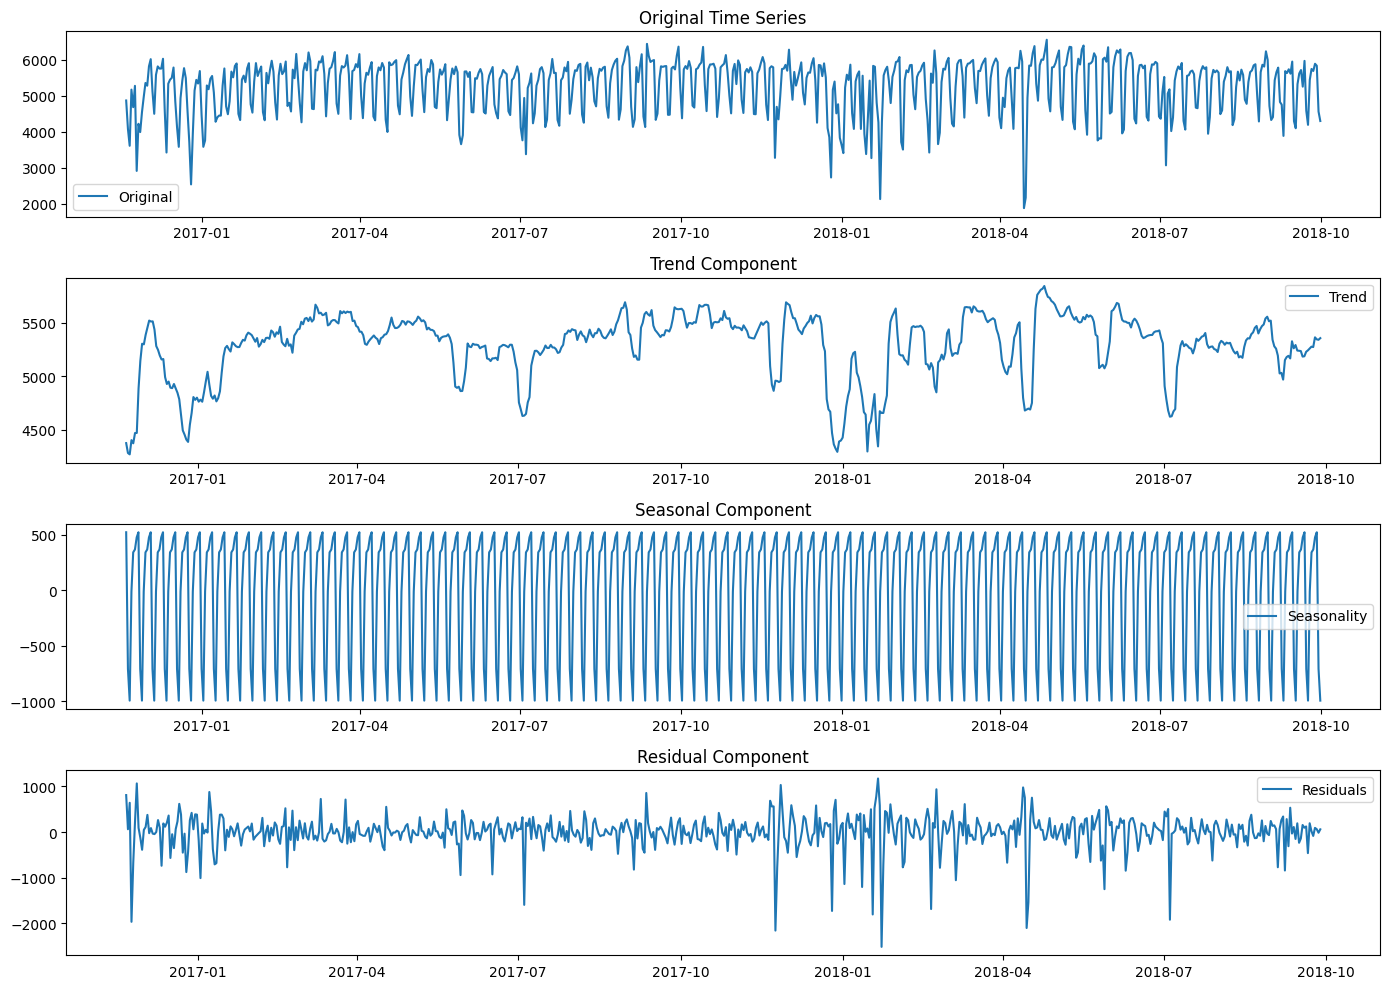

In [301]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = df[~df.index.duplicated(keep='first')]
# Infer the frequency of your time series (replace 'D' with the appropriate frequency if needed)
df = df.asfreq('D')

decomposition = seasonal_decompose(df['traffic_volume'], model='additive')  # Use 'multiplicative' if appropriate

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['traffic_volume'], label='Original')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(df.index, trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(df.index, seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(df.index, residual, label='Residuals')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()

**I noticed from the previous chart that the change in the data is seasonal (congestion decreased in one month of 2017 and also at the beginning of the following year)**

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

## Resample the data

In [302]:
df = df.resample('M').agg({'traffic_volume': 'mean'}) # Monthly

## Create lag features

In [303]:
df['L1'] = df['traffic_volume'].shift(1)

## Create moving average

In [304]:
df['M1'] = df['traffic_volume'].rolling(window=7).mean()

## Make sure that the dates are sorted

In [305]:
df = df.sort_index()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


**Difference between traffic_volume**

In [306]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [307]:
df = df.reset_index()

df['day'] = df['date_time'].dt.dayofweek  # 0-6 , Monday to Sunday
df['month'] = df['date_time'].dt.month
df['day_of_year'] = df['date_time'].dt.dayofyear

df = df.set_index('date_time')
df = pd.DataFrame(df, columns=df.columns, index=df.index)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [308]:
split_ratio = 0.8 #Training data 80%
split_index = int(len(df) * split_ratio)

train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [309]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_df)

train_df_scaled = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns, index=train_df.index)
test_df_scaled = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns, index=test_df.index)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

I choose

In [310]:
# Target variable
train_series = train_df['traffic_volume']
test_series = test_df['traffic_volume']

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [327]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
model = SARIMAX(train_series,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [328]:
predictions = model_fit.forecast(steps=len(test_series))

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [329]:
mse = mean_squared_error(test_series, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.4010742976000836


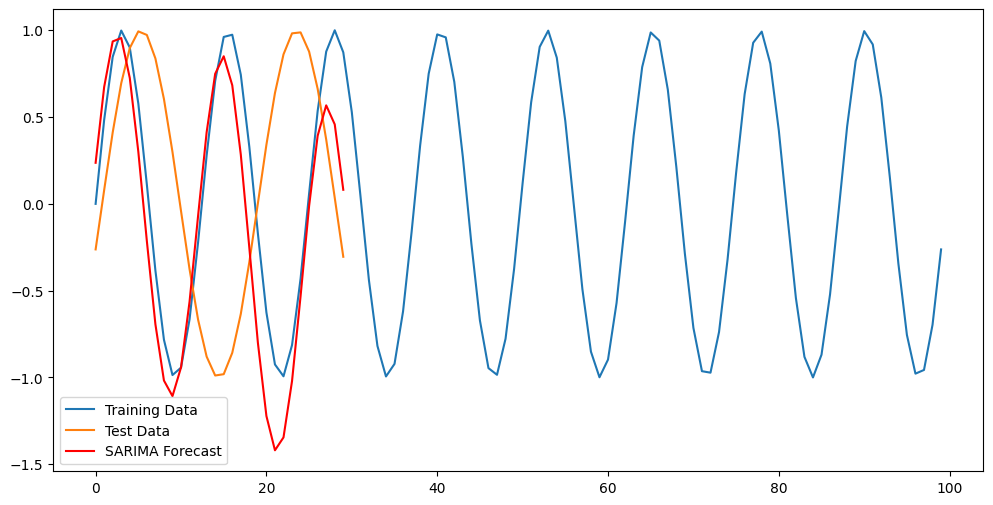

In [331]:
plt.figure(figsize=(12, 6))
plt.plot(train_series.index, train_series, label='Training Data')
plt.plot(test_series.index, test_series, label='Test Data')
plt.plot(test_series.index, predictions, label='SARIMA Forecast', color='red')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [315]:
train_series = pd.Series(np.sin(np.linspace(0, 50, 100)))
test_series = pd.Series(np.sin(np.linspace(50, 60, 30)))

In [316]:
scaler = MinMaxScaler()

# Fit and transform training data
train_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1))

# Transform test data
test_scaled = scaler.transform(test_series.values.reshape(-1, 1))

In [317]:
def create_dataset(data, look_back=1):
    X, Y = [], []
    # Ensure enough data points after applying look_back
    # Adjusted condition to handle cases where len(data) <= look_back
    for i in range(max(0, len(data) - look_back - 1)):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Define look_back
look_back = 10

# Create datasets
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [318]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - loss: 0.3640 - val_loss: 0.1980
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3041 - val_loss: 0.1671
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2252 - val_loss: 0.1739
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1941 - val_loss: 0.2048
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1912 - val_loss: 0.2123
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1951 - val_loss: 0.1939
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1852 - val_loss: 0.1658
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1742 - val_loss: 0.1521
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1705 - val_loss: 0.1479
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1616 - val_loss: 0.1476
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1616 - val_loss: 0.1467
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1475 - val_loss: 0.1433
Epoch 13/50

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [319]:
predictions_scaled = model.predict(X_test)

# Inverse transform predictions
predictions_inv = scaler.inverse_transform(predictions_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [320]:
mse_lstm = mean_squared_error(y_test_inv, predictions_inv)
print(f'LSTM Mean Squared Error: {mse_lstm}')

LSTM Mean Squared Error: 0.705086396057518


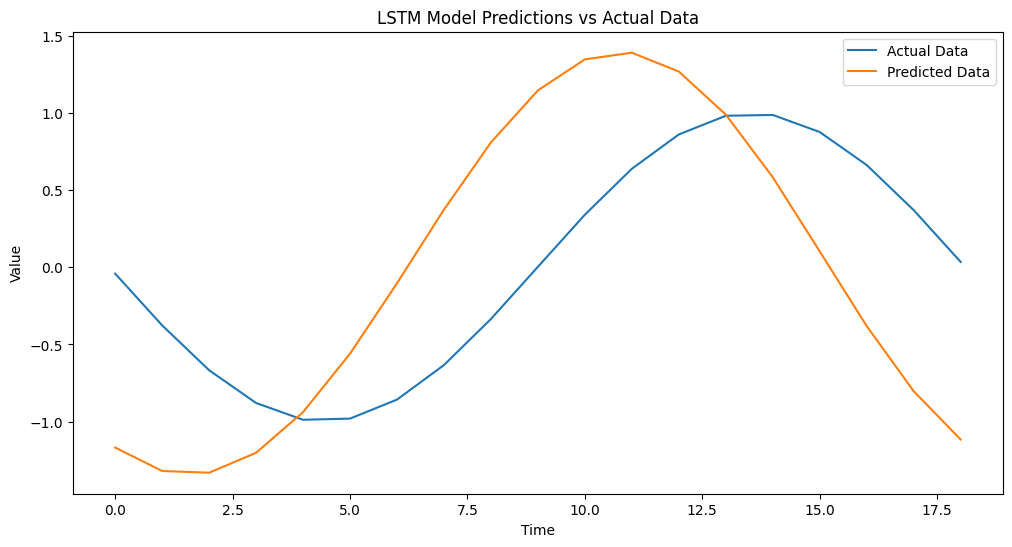

In [321]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Data')
plt.plot(predictions_inv, label='Predicted Data')
plt.title('LSTM Model Predictions vs Actual Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
1. I used MinMaxScaler for nomalization
And you filled in missing values ​​with the mean.
2. I extracted the day and month from the date.
3. I chose the SARIMA model because I noticed that the data tends to change seasonally, and I chose the LSTM model.
4. Yes I tried to improve the model training by choosing different values.
5. I used MSE in both models for the reason of minimizing the overall error.

7. There was no Overfitting and Underfitting.
